# ASHITA K
# ADVANCE TASK LEVEL 5
# Exploratory Data Analysis - Sports
# The Sparks Foundation GRIP-JAN 2022 (Data Science and Business Analytics Intern)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
match = pd.read_csv("matches.csv")

In [5]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
deliveries = pd.read_csv("deliveries.csv")

In [7]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
match.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [9]:
match.shape

(756, 18)

In [10]:
deliveries.shape

(179078, 21)

In [11]:
deliveries.columns.values

array(['match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs',
       'player_dismissed', 'dismissal_kind', 'fielder'], dtype=object)

In [12]:
season_match=match[['id','season','winner']]
complete_match=deliveries.merge(season_match,how='inner',left_on='match_id',right_on='id')

In [13]:
win = match.groupby("season")["winner"].value_counts()
win

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

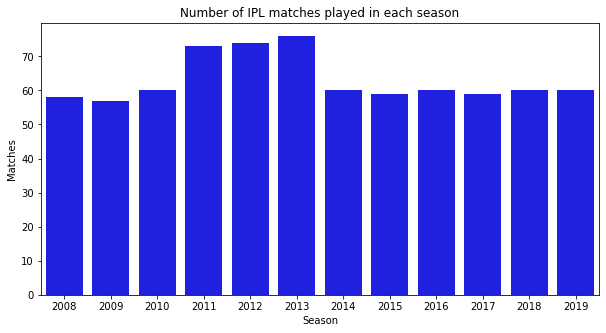

In [22]:
plt.figure(figsize = (10,5))
sns.countplot('season', data=match, color='blue')
plt.title("Number of IPL matches played in each season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.show()

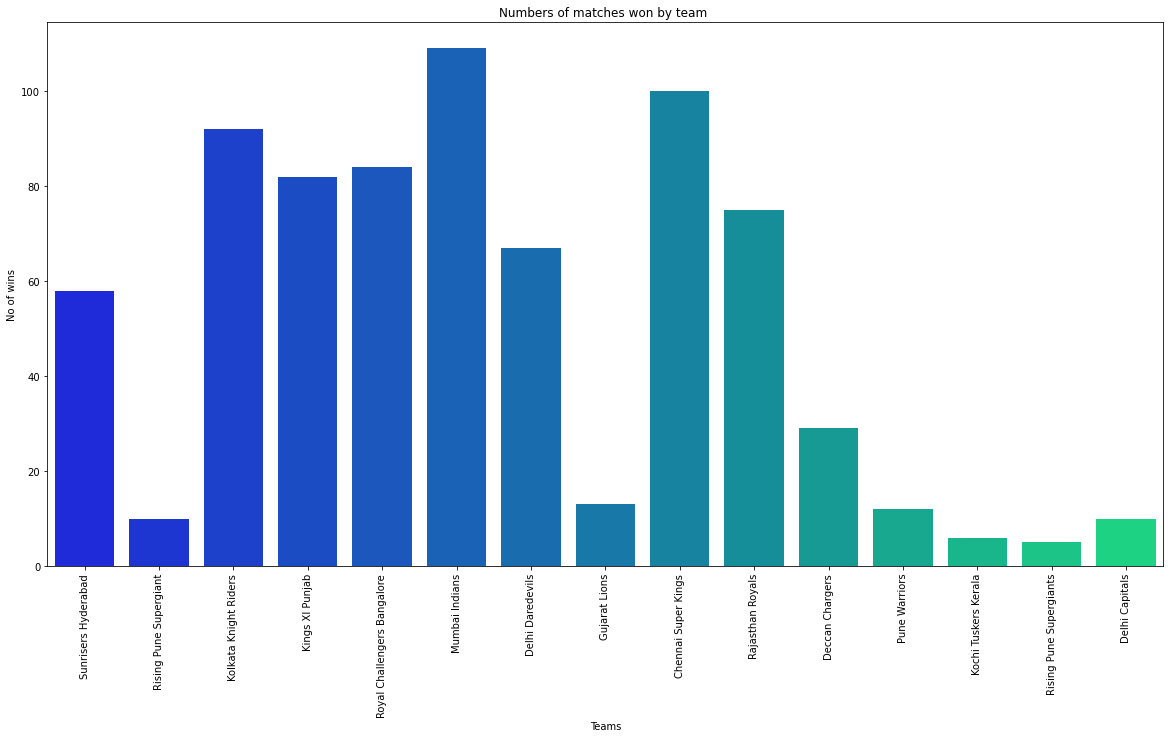

In [25]:
plt.figure(figsize = (20,10))
sns.countplot('winner', data=match, palette='winter')
plt.title("Numbers of matches won by team ")
plt.xlabel("Teams")
plt.ylabel("No of wins")
plt.xticks(rotation=90)
plt.show()

In [26]:
match['win_by']=np.where(match['win_by_runs']>0,'Bat first','Bowl first')

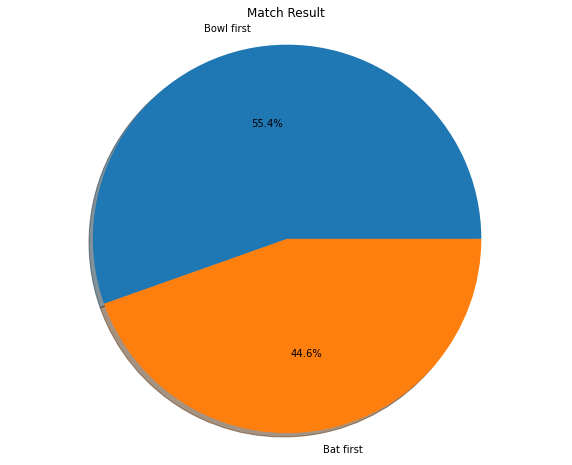

In [38]:
Win=match.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Match Result')
plt.axis('equal')
plt.show()

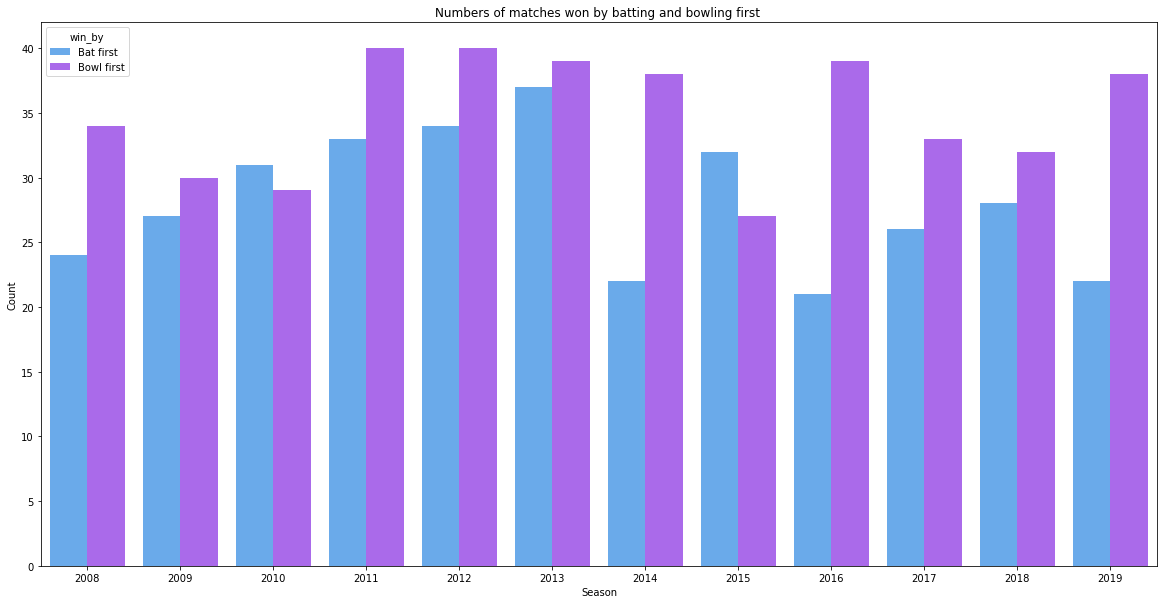

In [39]:
plt.figure(figsize = (20,10))
sns.countplot('season', hue='win_by', data=match, palette='cool')
plt.title("Numbers of matches won by batting and bowling first ")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

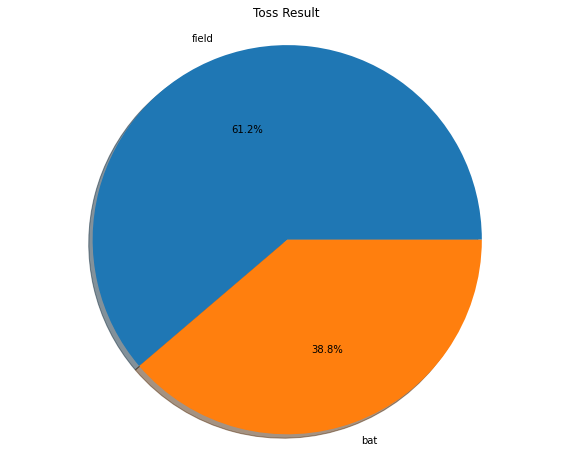

In [42]:
Toss=match.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Toss Result')
plt.axis('equal')
plt.show()

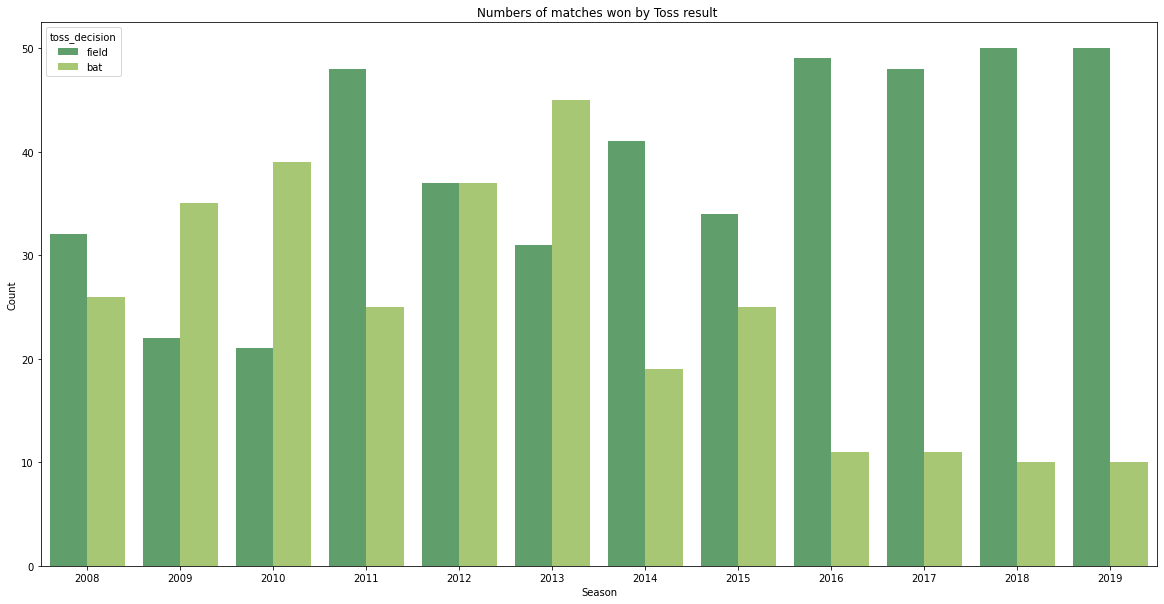

In [45]:
plt.figure(figsize = (20,10))
sns.countplot('season', hue='toss_decision', data=match, palette='summer')
plt.title("Numbers of matches won by Toss result ")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

In [46]:
match_final=match.drop_duplicates(subset=['season'], keep='last')
match_final[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


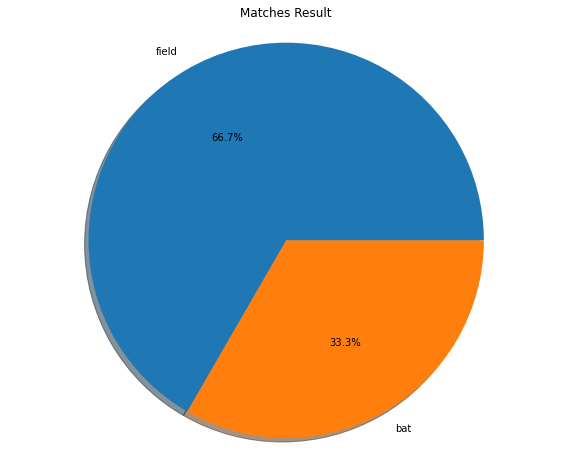

In [50]:
matches=match_final.win_by.value_counts()
labels=np.array(Toss.index)
sizes = matches.values
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Matches Result')
plt.axis('equal')
plt.show()

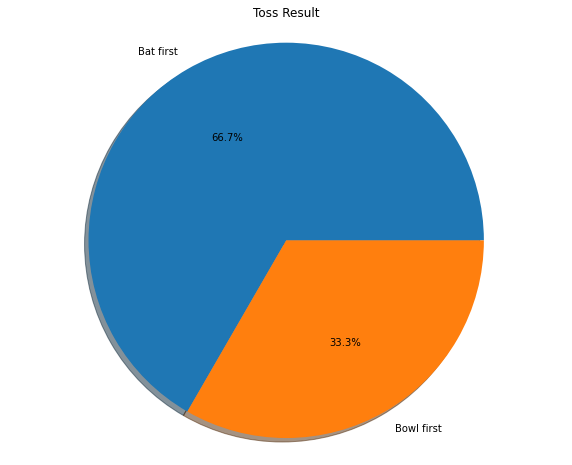

In [51]:
Toss=match_final.win_by.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Toss Result')
plt.axis('equal')
plt.show()

<Figure size 1440x720 with 0 Axes>

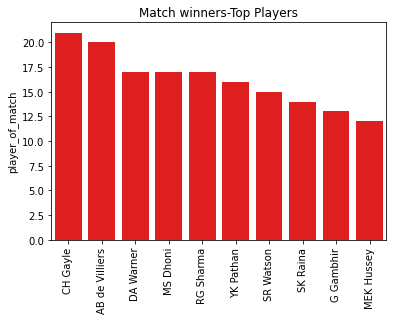

In [56]:
plt.figure(figsize = (20,10))
top_players = match.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylabel("Count")
ax.set_title("Match winners-Top Players")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', color='red');
plt.show()

In [57]:
match_final.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [58]:
match_final["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [59]:
match_final[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [60]:
match_final[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [62]:
len(match_final[match_final['toss_winner']==match_final['winner']]['winner'])

9

In [63]:
match_fours=complete_match[complete_match['batsman_runs']==4]
match_fours.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


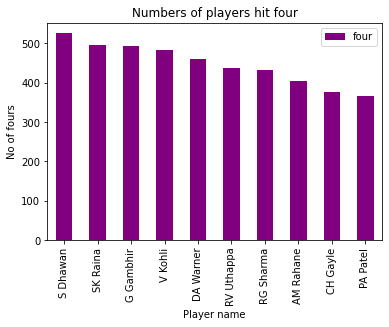

In [65]:
batsman_fours=match_fours.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_fours.iloc[:10,:].plot('batsman','four', kind='bar', color='purple')
plt.title("Numbers of players hit four")
plt.xlabel("Player name")
plt.ylabel("No of fours")
plt.xticks(rotation=90)
plt.show()

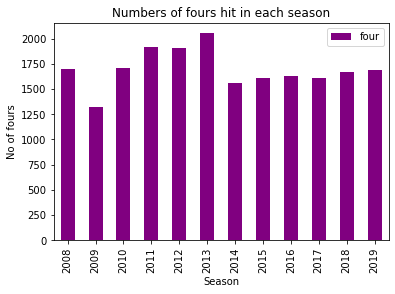

In [66]:
ax = match_fours.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'purple')
plt.title("Numbers of fours hit in each season")
plt.xlabel("Season")
plt.ylabel("No of fours")
plt.xticks(rotation=90)
plt.show()

In [67]:
match_six=complete_match[complete_match['batsman_runs']==6]
match_six.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


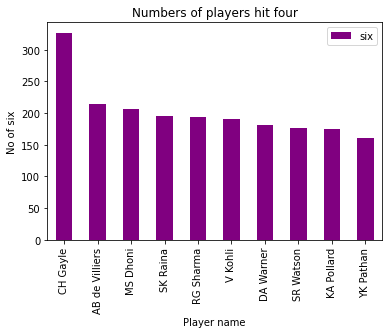

In [68]:
batsman_six=match_six.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six', kind='bar', color='purple')
plt.title("Numbers of players hit four")
plt.xlabel("Player name")
plt.ylabel("No of six")
plt.xticks(rotation=90)
plt.show()

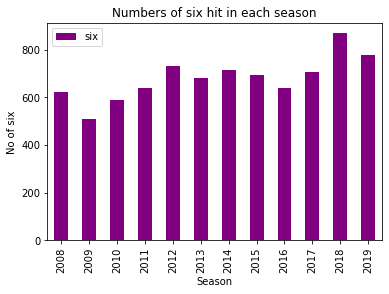

In [69]:
ax = match_six.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'purple')
plt.title("Numbers of six hit in each season")
plt.xlabel("Season")
plt.ylabel("No of six")
plt.xticks(rotation=90)
plt.show()

In [71]:
batsman_score=deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("Leading Run Scorer in IPL")
batsman_score.iloc[:10,:]

Leading Run Scorer in IPL


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


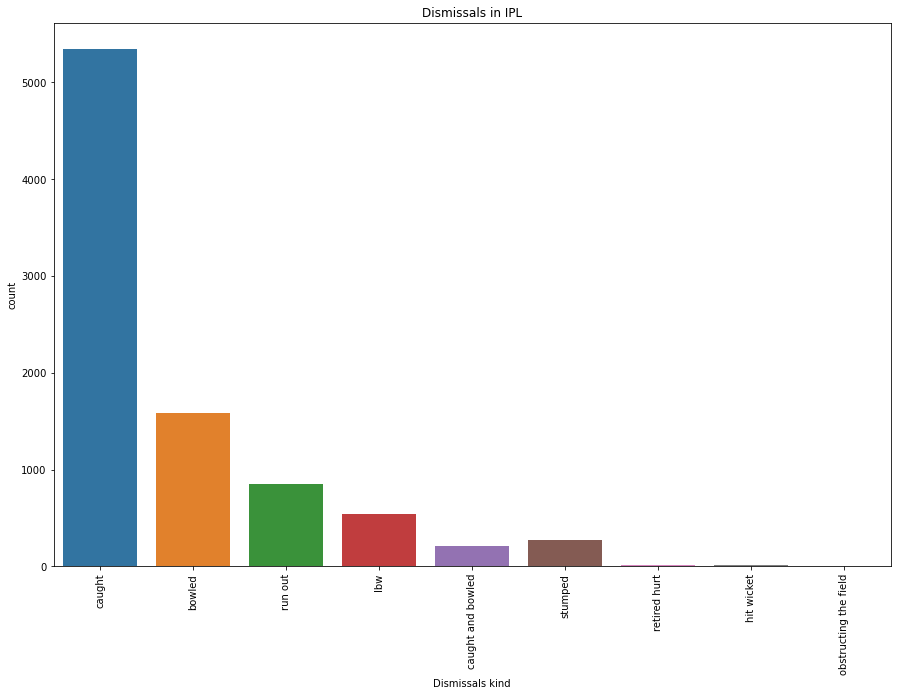

In [78]:
plt.figure(figsize=(15,10))
ax=sns.countplot(deliveries.dismissal_kind)
plt.title("Dismissals in IPL")
plt.xlabel("Dismissals kind")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

In [80]:
match_wicket=deliveries.dropna(subset=['dismissal_kind'])
match_wicket=match_wicket[~match_wicket['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
match_wicket.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


# INFERENCE

# 1. The highest number of matches was won by Mumbai Indians
# 2. 2013, 2014 and 2015 were the years in which highest number of IPL     matches was played.
# 3. Shikar Dhawan hit the highest number of fours.
# 4. CH gayle hit the highest number of six.
# 5. SK Raina, RG Sharma played the highest number of IPL matches.
# 6. Top-players of matches winning are CH gayle, AB de villers.
# 7. Virat kholi, SK Raina, RG Sharma are the top-leading run scorer.
# 8. SL Malinga was the most wickettaken bowler in IPL.